<a href="https://colab.research.google.com/github/handetushar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**''Bike sharing clicks into a higher gear''**

##Bike rental businesses give customers—who are often, but not necessarily, tourists—bicycles for a short period. Bikes are generally rented for a few hours to recreationally explore the locality. But the customer base might also consist of college students on campus or others who rent for practical reasons.
##City bike rentals are particularly popular among tourists who like to explore their destination by bicycle. Usually, the customers of these businesses are most interested in an efficient, comfortable, and safe way of commuting from one place to another. Depending on the destination, weather conditions or the business can be seasonal. However, due to very seasonal industry it can be negatively affected by environmental forecasts and various other variables.

##Bike sharing is increasingly attracting more riders in cities around the world for its benefits regarding the urban environment and public health.One critical issue that Seoul is currently facing is the serious air pollution levels. The city’s PM10 and PM2.5 levels maintained considerably high levels in the past few years.

#**''Go Green''**


# Importing dependencies

In [120]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#**Data Warehousing**

In [121]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML/SeoulBikeData.csv', encoding= 'unicode_escape')

In [123]:
df1=df.copy()

In [124]:
#Display first five row
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [125]:
# Check the size of the dataset
df.shape

(8760, 14)

In [126]:
#Reviewing the variables
print('\033[1m Here are the features that will be scrutinized ahead: \033[0m \n ')
df.columns

 Here are the features that will be scrutinized ahead:  
 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Inspection**

In [127]:
#Recall data
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


s we can see our data have **8760 instances** and **14 features**.

In [128]:
#Checking the number of unique values in columns.
n = df.nunique(axis=0)
  
print("\033[1mNo.of unique values in each column :\033[0m\n")
n

No.of unique values in each column :



Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

After checking unique values, we can observe that seasons, holiday, func_day are categorical columns among all features.

In [129]:
#Getting the number of unique values of some categorical variables with their counts.
for var in df.columns:
  if var in ['Holiday','Functioning Day','Seasons']:
    print(f'\033[1m\033[4mThe column {var} has unique values\033[0m:\n{df[var].value_counts()}')

The column Seasons has unique values:
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
The column Holiday has unique values:
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
The column Functioning Day has unique values:
Yes    8465
No      295
Name: Functioning Day, dtype: int64


# **Data Cleaning**
Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.




**Duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.**

In [130]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is =\033[0m ",value)

The number of duplicate values in the data set is =  0


In [131]:
#Some details about the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [132]:
#Check if there are some null values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

* **Fortunately, as seen above, we do not have any Null/Missing values or duplicate values.**

#**Descriptive Statistics**

In [133]:
# Getting more information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [134]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


For calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame we use .describe(). It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

##Numbers when the facility for sharing bicycle rentals is not functioning day?

In [135]:
#Ploting Pivot table for the function day or not function day with respect to holiday or not holiday
pd.pivot_table(df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                     Autumn  Spring  Summer  Winter  TOTAL
Holiday    Functioning Day                                       
Holiday    No                 24.0     NaN     NaN     NaN     24
           Yes                96.0    72.0    48.0   192.0    408
No Holiday No                223.0    48.0     NaN     NaN    271
           Yes              1841.0  2088.0  2160.0  1968.0   8057
TOTAL                       2184.0  2208.0  2208.0  2160.0   8760

* In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is Non Holiday and also not functioning day.

* In spring, there are 48 records when that day is work day but not functioning. In conclusion, demand for bike rentals declines on non-operational days, as was the case in the spring and autumn.

* When there is a functional day and not a holiday, the records are higher.

#**Exploratory Data Analysis (EDA)**

An EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant for a business because it identifies trends, patterns, and linkages that are not intuitively clear.

##**Univariate Analysis**

* Provides summary statistics for each field in the raw data set or summary only on one variable.

* The ultimate purpose of a Univariate analysis is to simply explain the data and look for patterns therein.

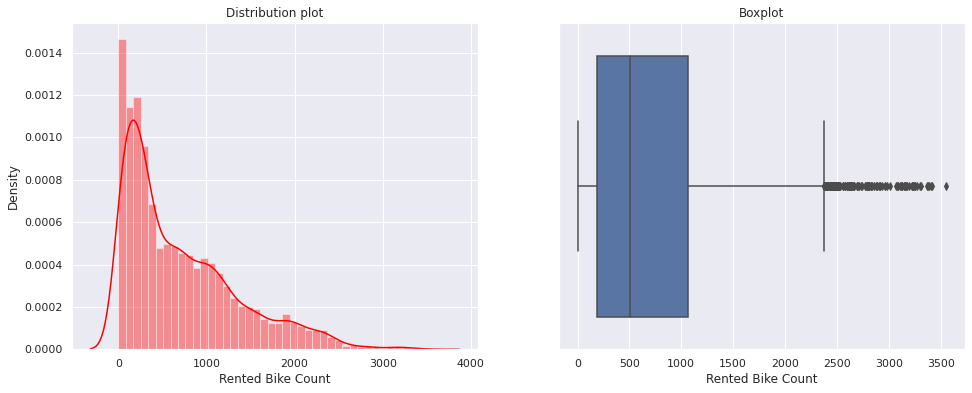

In [136]:
#Let us look at dependent feature
#DensityPlot
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(df['Rented Bike Count'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.title('Boxplot');

Dependent feature is skewed right. We need to apply transformation to remove skewness.

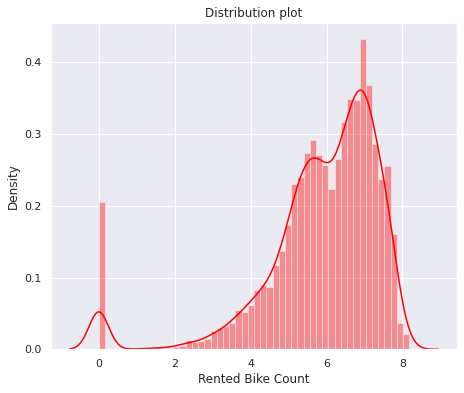

In [137]:
#Balancing the skewness using log transformation
# log1p is used instead of log10 to make value positive in array.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.log1p(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

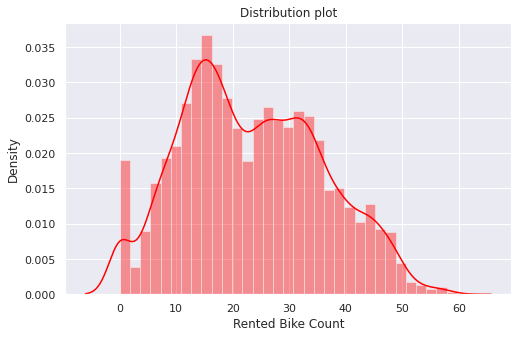

In [138]:
#Apply transformation
plt.figure(figsize=(8, 5))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The square root transformation on the dependent variable gives us distribution which is almost normal in nature.**

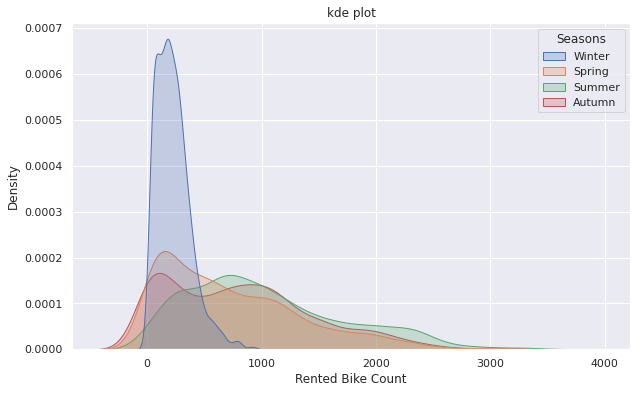

In [139]:
#kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Rented Bike Count', hue='Seasons', fill='True')
plt.title('kde plot');

In [140]:
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

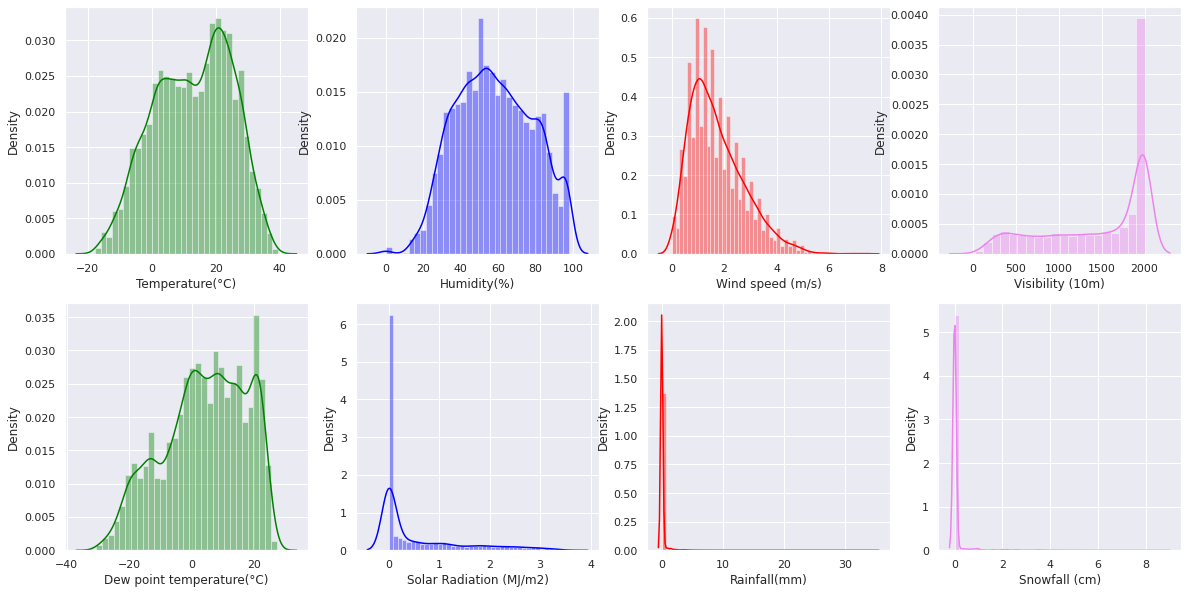

In [141]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(df['Snowfall (cm)'], color='violet')

* We can see from the preceding distplots that **"Temperature"**, **"Dew point temperature"** and **"Humidity"** follow approximately normal distribution.
* The distribution of all other variables is either left- or right-skewed.

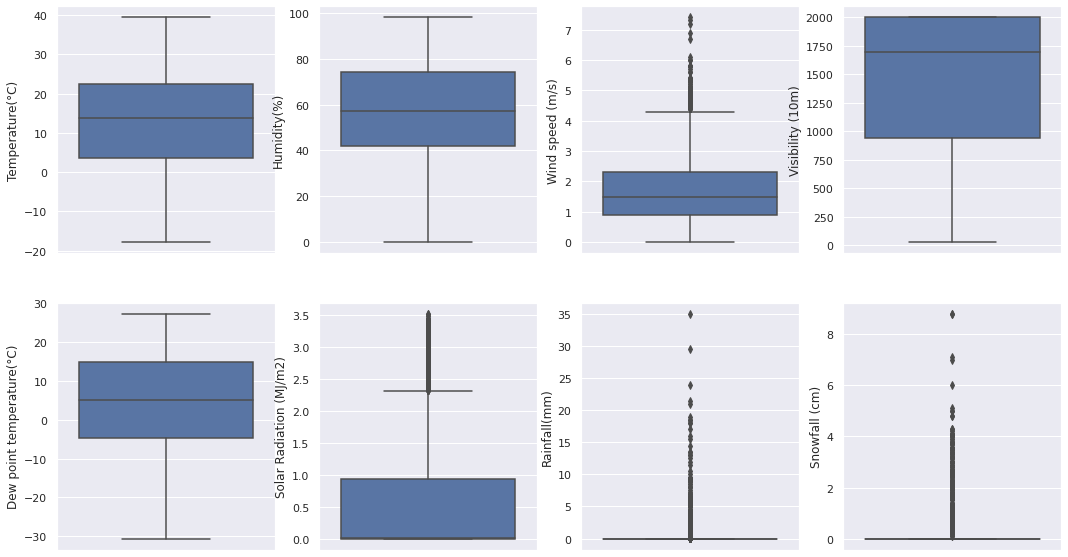

In [142]:
#Plotting boxplot for each independent variables
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(y=df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(y=df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(y=df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(y=df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(y=df['Dew point temperature(°C)'] )
subplot(2,4,6)
sns.boxplot(y=df['Solar Radiation (MJ/m2)'])
subplot(2,4,7)
sns.boxplot(y=df['Rainfall(mm)'])
subplot(2,4,8)
sns.boxplot(y=df['Snowfall (cm)'])

**We can see some outliers present in our dataset. We will rectify this in our analysis ahead.**

##**Bivariate Analysis**

It is performed to find the relationship between each variable in the dataset and the target variable of interest or using 2 variables and finding the relationship between them.

In [143]:
#Compare features with target variable.
comp_features = df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Hour','Seasons','Wind speed (m/s)','Visibility (10m)']]

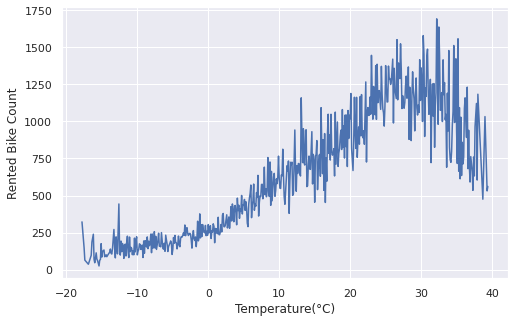

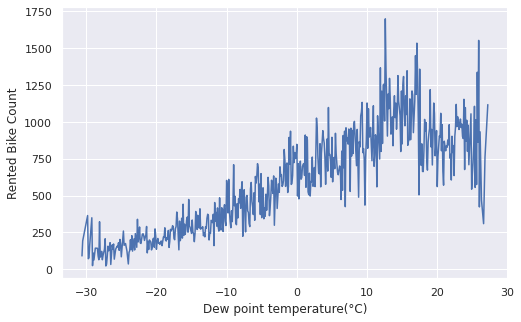

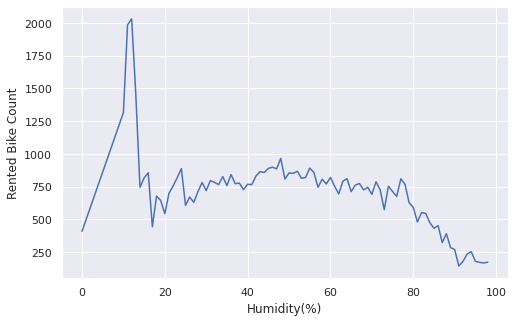

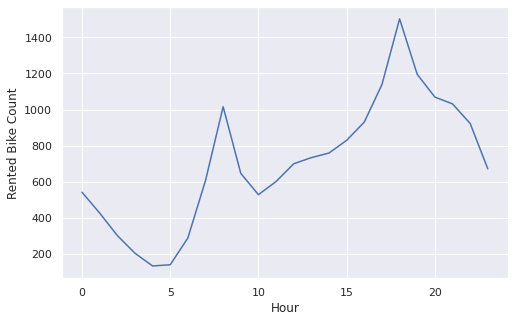

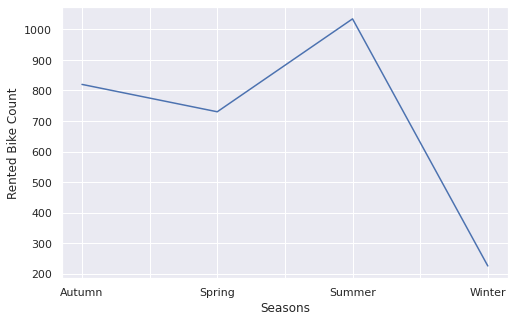

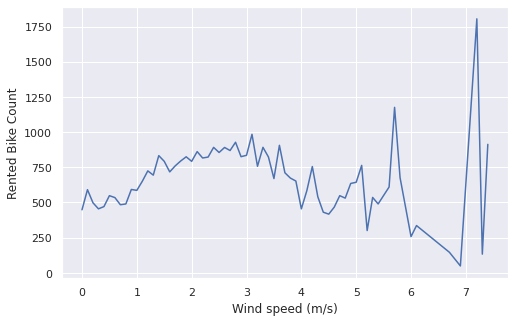

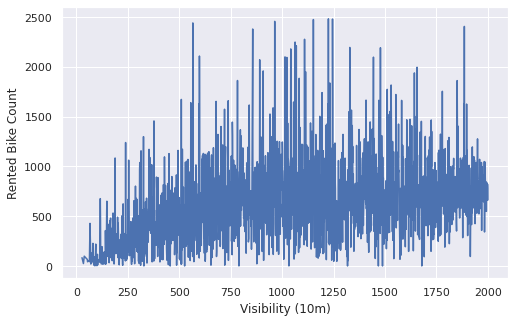

In [144]:
#Plots
for col in comp_features:
  plt.figure(figsize=(8,5))
  df.groupby(col).mean()['Rented Bike Count'].plot()
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
plt.show()

**Some of the following observations can be interpreted based on the above analysis:**

* The trend for bike rentals grows from temperature 20 to 30 degrees Celsius.

* The dew point temperature behaves similar to the temperature for the dependant variable.

* Lower humidity tends to increase demand for bike rentals.

* The bike usage is high in peak office hours that is 7-9 AM in morning and 6-8 PM in evening.

* People prefer to drive in the summer season when the wind is stronger.

#**Barplots**
Using barpot we can plot two or more attributes together and compare them.

In [145]:
# Convert date into day, month and year.
import datetime
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

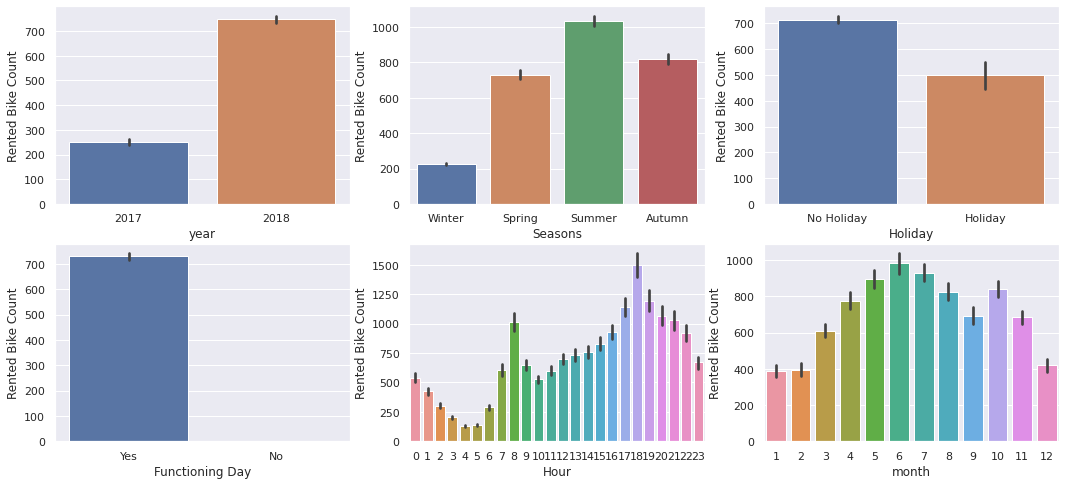

In [146]:
#Plotting bar
sns.set(rc={"figure.figsize": (18, 8)})
subplot(2,3,1)
sns.barplot(df['year'], y=df['Rented Bike Count'])
subplot(2,3,2)
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])
subplot(2,3,3)
sns.barplot(x=df['Holiday'],y=df['Rented Bike Count'])
subplot(2,3,4)
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])
subplot(2,3,5)
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])
subplot(2,3,6)
sns.barplot(x=df['month'],y=df['Rented Bike Count']);

#**Scatterplots**
Draw the scatterplot dependent and independent features and draw the bestfit line.

In [147]:
#List the columns with numerical values
numeric_features=[]
for i in df.columns:
  if df[i].dtype!='O':
    numeric_features.append(i)

numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day']

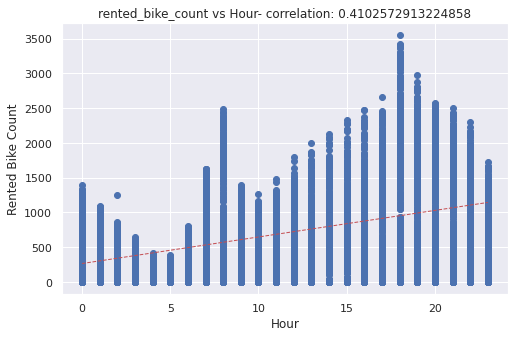

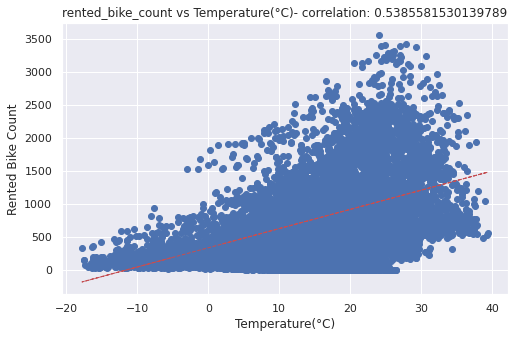

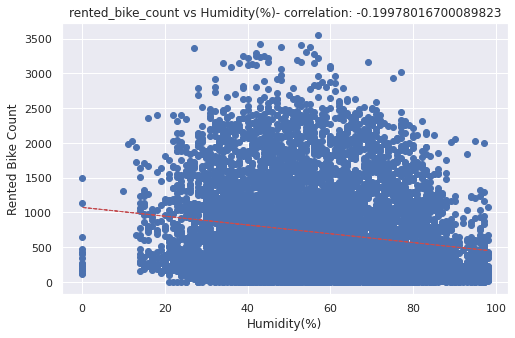

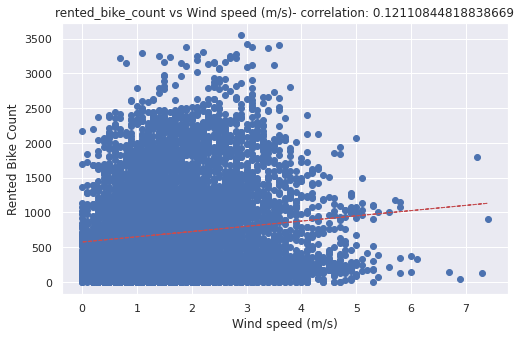

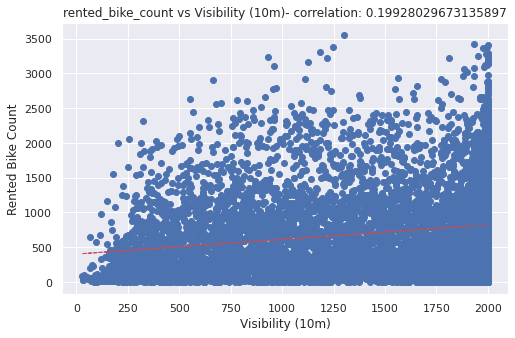

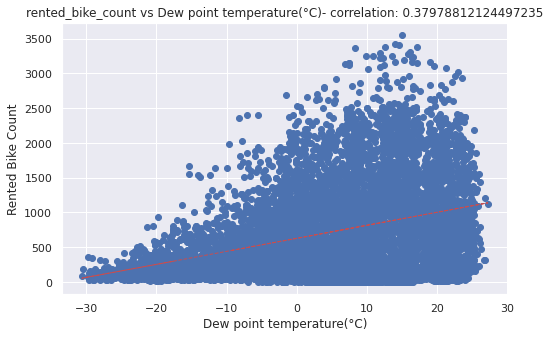

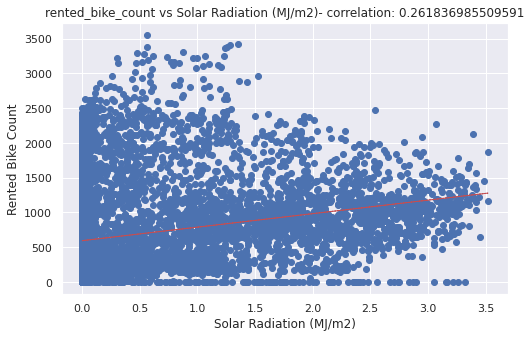

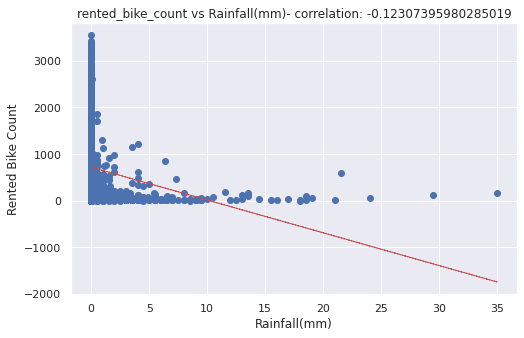

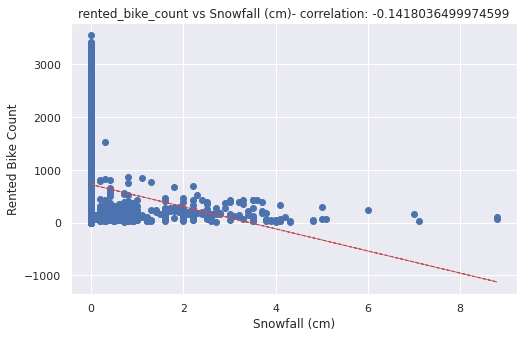

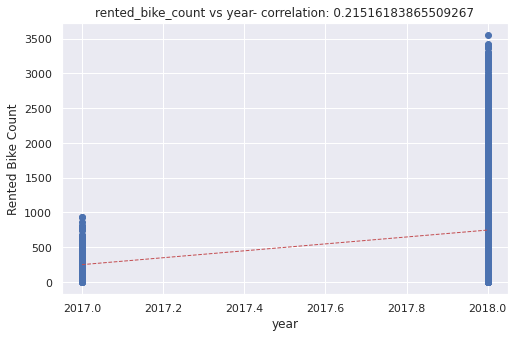

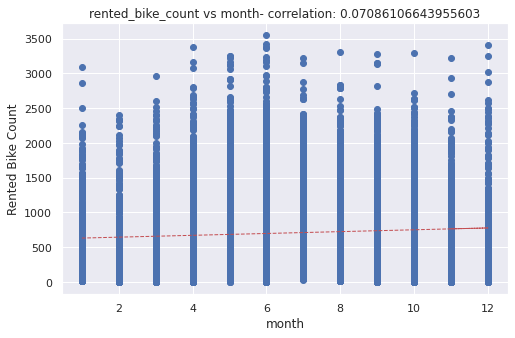

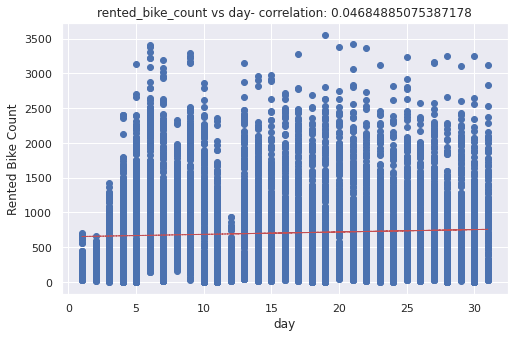

In [148]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**We can identify the following insights using regression plot:**

*   Hour exhibits positive linearity with rented bike count, but it doesn't seems homoscadastic in nature.
*   The temperature feature has a little homoscadastic nature and is positively linear with the frequency of rented bikes.
*   Humidity, sun radiation, snowfall, and rainfall all show negative linearity with the target variable, indicating that in real-world conditions, individuals avoid riding bikes during snowfall, rain, and high humidity. 
*   Positive linearity of wind speed and visibility with rented bike count is somewhat intuitive, since higher wind speed and greater visibility tend to increase demand for rental bikes.
*   Month, Year, and Day have hardly any effect on our target variable.

#**Identifying Multicollinearity:**
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. 

## **Heatmap**


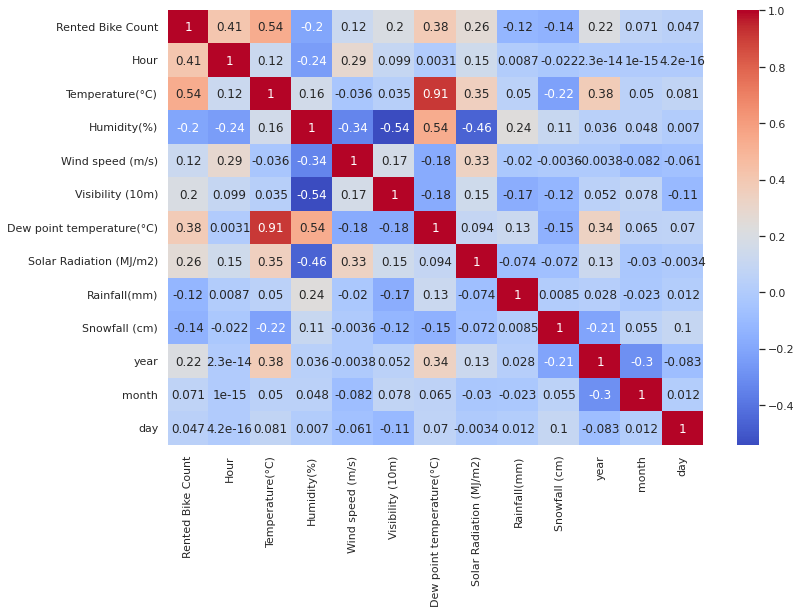

In [149]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## **From above heatmap we can see that**
* Features are highly positively correlated with independent variable are Hour, Temperature, Dew point temperature. 
* Features are negatively correlated with independent features are Humidity, Rainfall, Snowfall.
*Dew point temp is highly correlated with temperature. 

In [150]:
# Removing Multicollinearity
df = df.drop(['Dew point temperature(°C)'], axis=1)
df1 = df.drop(['Rented Bike Count'], axis=1)

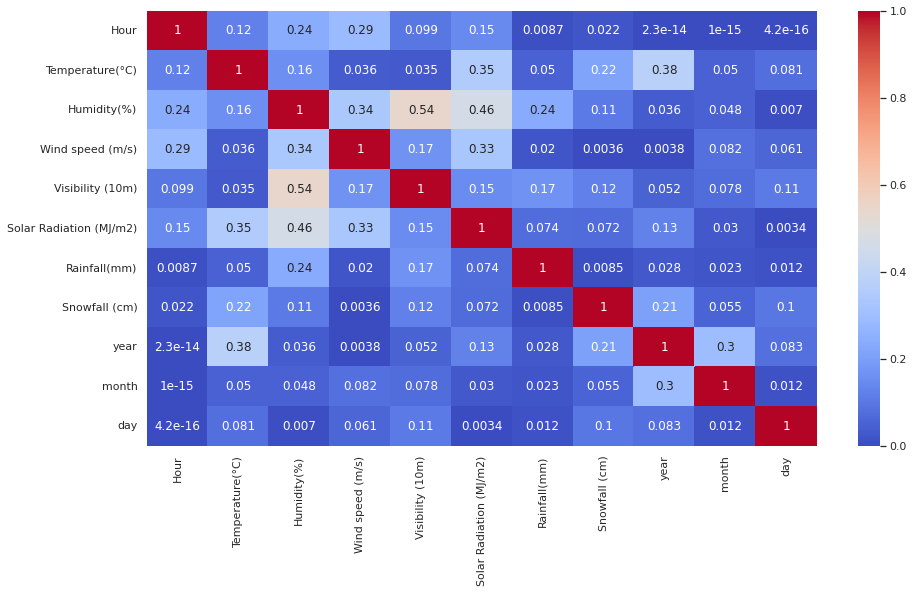

In [151]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

***Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).In VIF method, we pick each feature and regress it against all of the other features.***

In [152]:
#By using VIF score we can also check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [153]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year', 'month', 'day']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


Temprature and dew point temparature having high VIF lets drop dew point temperature, since both are linearly correlated with each other.

## Handeling the outliers
Outliers can mislead the training process which results less accurate models and bad results.

In [154]:
#Collect all numericall features
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day'],
      dtype='object')

Drop the independent variable, hour, day, month and year from this list, since they dont have the outliers.

In [155]:
to_remove=['Rented Bike Count', 'Hour','year', 'month', 'day']
numeric_features=list(set(numeric_features)-set(to_remove))
numeric_features

['Solar Radiation (MJ/m2)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Snowfall (cm)',
 'Wind speed (m/s)',
 'Visibility (10m)']

In [156]:
#Removing the outliers

features1 = numeric_features

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    a = (Q3+(1.5*IQR))
    b = (Q1-(1.5*IQR))
    df1[i].apply(lambda x: a if x>=a else x )
    df1[i].apply(lambda x : b if x <= b else x)
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had \033[1m{}\033[0m samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has \033[1m{}\033[0m samples.'.format(df1.shape[0]))

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,01/12/2017,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,01/12/2017,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,01/12/2017,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,01/12/2017,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,01/12/2017,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12



Inference:
Before removal of outliers, The dataset had 8760 samples.
After removal of outliers, The dataset now has 8760 samples.


#Handling categorical features
We will convert categorical values into numerical values, for that we can use OneHot encoding or mapping to binary values.

In [157]:
#OneHot encoding
seasons_df=pd.get_dummies(df['Seasons'], prefix='seas', prefix_sep='_', drop_first='True')
holiday_df=pd.get_dummies(df['Holiday'], drop_first='True')
funday_df=pd.get_dummies(df['Functioning Day'], prefix='fun_day', drop_first='True')

In [ ]:
#Mapping the Variables
#df['Isfunc_day']=df['Functioning Day'].map({'Yes':1,'No':0})
#df['Isholiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
#Converting column Seasons into dummy variables
#seasons=pd.get_dummies(df['Seasons'],drop_first=True)
#df=pd.concat([df,seasons],axis='columns')

In [158]:
new_df=pd.concat([df,seasons_df, holiday_df, funday_df], axis=1)

In [159]:
#drop categorical features now
new_df.drop(['Date', 'Seasons', 'Holiday','Functioning Day'],axis=1, inplace=True)

In [160]:
#Check the columns of the new dataframe.
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day', 'seas_Spring',
       'seas_Summer', 'seas_Winter', 'No Holiday', 'fun_day_Yes'],
      dtype='object')

In [161]:
# Rename the columns in the proper format
new_df=new_df.rename(columns={'Rented Bike Count':'bike_count','Hour':'hours','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                              'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility','Solar Radiation (MJ/m2)':'solar_rad', 'Rainfall(mm)':'rainfall',
                              'Snowfall (cm)':'snowfall','No Holiday':'working_day','fun_day_Yes':'functioning_day' })

In [162]:
#Display first five rows
new_df.head()

,bike_count,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


In [163]:
#Checking the shape of the dataset
new_df.shape

(8760, 17)

In [164]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
#y=new_df['bike_count']
y=np.sqrt(new_df['bike_count'])

# **Modeling**

In [165]:
#Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [166]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
# Dependent feature was right skewed apply root transfomation to make it normal
y=np.sqrt(new_df['bike_count'])

In [167]:
#train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [168]:
# Check size of train and test set
print(X_train.shape, X_test.shape )

(7008, 16) (1752, 16)


In [169]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ...,  1.7507042 ,
         0.23202281,  0.18254726],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       [-1.65763652, -0.38039334,  0.0423343 , ..., -0.57119872,
         0.23202281,  0.18254726],
       [ 1.22954439, -0.48062601,  1.22334111, ..., -0.57119872,
         0.23202281,  0.18254726]])

In [171]:
#Converting nd array to Dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.head()

,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,0.507749,-0.388746,0.189960,-1.081683,-1.882041,0.738812,-0.127135,-0.172694,0.302355,-1.315881,0.822118,-0.578668,-0.579108,1.750704,0.232023,0.182547
1,0.940826,1.298504,-0.056083,0.647847,0.924155,0.304619,-0.127135,-0.172694,0.302355,0.426362,1.728711,-0.578668,1.726794,-0.571199,0.232023,0.182547
2,-0.069687,1.423795,-0.056083,-0.024748,0.911019,0.350323,-0.039940,-0.172694,0.302355,0.426362,0.822118,-0.578668,1.726794,-0.571199,0.232023,0.182547
3,-0.214046,0.162534,-1.433924,-1.081683,0.512010,1.858574,-0.127135,-0.172694,0.302355,-0.735133,1.048766,1.728105,-0.579108,-0.571199,0.232023,0.182547
4,1.229544,-0.054637,-0.548169,-0.601258,0.924155,-0.655177,-0.127135,-0.172694,0.302355,1.007110,0.142173,-0.578668,-0.579108,-0.571199,0.232023,0.182547


#Linear Regression

Linear Regression is used to perform regression task. It makes predictions for continuous/real or numeric variables. Since we converted all varibales into numeric values,lets try linear regression for prediction.

In [172]:
#Importing the model
from sklearn.linear_model import LinearRegression

#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [173]:
# Predicting train and test
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [174]:
#Check the value of the intercept
regressor.intercept_

23.550115598397316

In [175]:
#Check the coeffiecients of variables
regressor.coef_

array([ 3.38204332e+00,  5.62976936e+00, -3.30040169e+00,  1.38485756e-01,
        1.15502762e-01, -7.40960178e-01, -1.69758116e+00,  1.49509429e-03,
       -6.63042450e-01, -3.90394058e-02, -8.16232968e-02, -1.29799023e+00,
       -1.20198736e+00, -3.86133646e+00,  6.51171316e-01,  5.02320650e+00])

In [176]:
#Calculate the evaluation metrices
MSE_linear_train=mean_squared_error(y_test, y_pred)
print('Mean squared error for train is:', MSE_linear_train)

MSE_linear=mean_squared_error(y_test, y_pred)
print('Mean squared error is:', MSE_linear)

RMSE_linear=math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared errorvis :', RMSE_linear)

r2_score_train=r2_score(y_train, y_pred_train)*100
print('\033[1mTrain R2_Score\033[0m:', r2_score_train)

r2_linear=r2_score(y_test, y_pred)*100
print('\033[1m R2_Score\033[0m',r2_linear )

print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

Mean squared error for train is: 54.168512231883845
Mean squared error is: 54.168512231883845
Root mean squared errorvis : 7.359926102338518
Train R2_Score: 65.37558829570884
 R2_Score 65.60429258862041
Adjusted R2 :  65.28709874505726


In [177]:
# Compare actual values with predicted values
test_df = pd.DataFrame(y_test)
test_df['Predicted count']=y_pred
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
4059,17.888544,18.246779
6914,24.083189,25.065044
233,15.033296,19.669602
982,12.845233,15.841161
5967,25.416530,36.148062


In [178]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information/Feature Importance.
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_df.columns
mutual_info.sort_values(ascending=False)

temp               0.385818
hours              0.344775
seas_Winter        0.205138
solar_rad          0.185369
day                0.179555
functioning_day    0.138456
month              0.133394
humidity           0.106107
rainfall           0.070733
year               0.059683
visibility         0.057998
seas_Summer        0.055627
snowfall           0.047459
wind_speed         0.027788
seas_Spring        0.022260
working_day        0.004964
dtype: float64

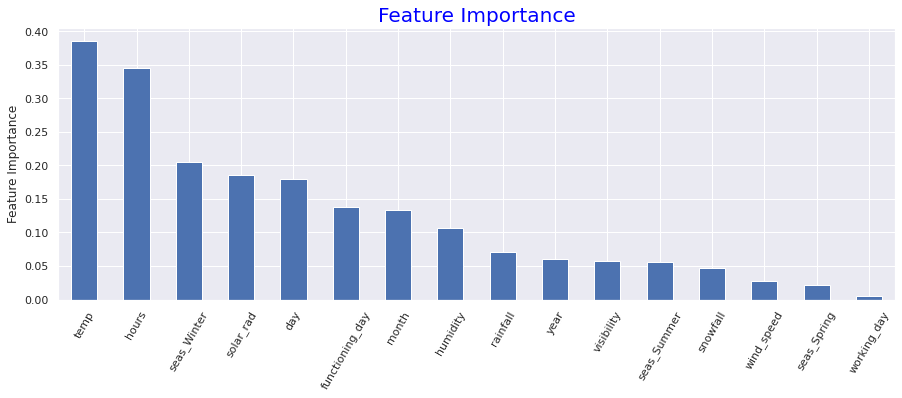

In [179]:
#Feature Importance Plot.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Feature Importance',fontsize=20, color = 'blue')
plt.xticks(rotation=60)
plt.ylabel("Feature Importance");

**Observations:**

* After implementing the linear regression algorithm, we obtain a R2 score of 65.60 %, which is considered appropriate. We will now attempt to maximize our R2 score by introducing more regression algorithms to our dataset.
* For a linear regression model, the Temperature feature seems to be very significant following Hour and Winter.

#Lasso regression
This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In [180]:
#Implementing fit to our dataset.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)
#Check score
lass_train_score= lasso.score(X_train, y_train)*100
lass_train_score

65.37558796404741

In [181]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [182]:
print("\033[1mThe best fit alpha value is found out to be :\033[0m" ,lasso_regressor.best_params_)
print("\n\033[1mUsing ",lasso_regressor.best_params_, " the negative mean squared error is:\033[0m ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.7188433762207


In [183]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [184]:
#Calculating MSE, RMSE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_lasso = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_lasso)

print(f'\033[1mTrain R2_Score\033[0m: {lass_train_score}')

r2_lasso = r2_score((y_test), (y_pred_lasso))*100
print("\033[1mR2\033[0m :" ,r2_lasso)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.216569538300334
RMSE : 7.36319017398711
Train R2_Score: 65.37558796404741
R2 : 65.57377735047977
Adjusted R2 :  65.25630209838044


#Ridge
Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.
Ridge regression is also referred to as L2 Regularization.

In [185]:
#Implementing ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [186]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -53.68833245932837


In [187]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [188]:
#Regression Evaluation Metrics for Ridge Regression
#Calculating MSE, RMSE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_ridge = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_ridge)

r2_ridge = r2_score((y_test), (y_pred_ridge))*100
print("\033[1mR2\033[0m :" ,r2_ridge)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.176118489138084
RMSE : 7.360442818821302
R2 : 65.59946279750686
Adjusted R2 :  65.28222441408329


In [189]:
#Comapre actual actual Vs predicted values
test_df['Predicted count']=y_pred_ridge
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
4059,17.888544,18.257887
6914,24.083189,25.051474
233,15.033296,19.657412
982,12.845233,15.863697
5967,25.416530,36.143319


#ElasticNet
Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [190]:
#Importing the model
from sklearn.linear_model import ElasticNet

#Preparing the model
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


In [191]:
#Fitting the values
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [192]:
#Predicting the values
y_pred_train_elastic=elastic_regressor.predict(X_train)
y_pred_elastic = elastic_regressor.predict(X_test)

In [193]:
#Check the best parameters
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -53.72084818801373


In [194]:
#Regression Evaluation Metrics for Elasticnet Regression
#Calculating MSE, RMSE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_elasticnet = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_elasticnet)

elastic_train_score=r2_score(y_train,y_pred_train_elastic)*100
print(f'\033[1mTrain R2_Score\033[0m: {elastic_train_score}')

r2_elasticnet = r2_score((y_test), (y_pred_elastic))*100
print("\033[1mR2\033[0m :" ,r2_elasticnet)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.1743544605854
RMSE : 7.36032298615933
Train R2_Score: 65.37553944749266
R2 : 65.60058291337239
Adjusted R2 :  65.28335485954757


In [195]:
#Comapre actual values with predicted values
test_df['Predicted count']=y_pred_elastic
test_df.head()

,Actual Count,Predicted count
4059,17.888544,18.253461
6914,24.083189,25.054994
233,15.033296,19.656613
982,12.845233,15.856715
5967,25.416530,36.143915


Text(0.5, 1.0, 'Comparision of actual and predicted values')

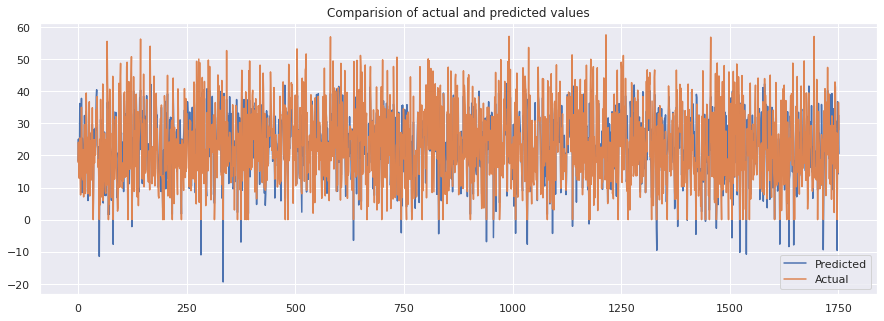

In [196]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

# **Decision tree**

In [197]:
#Implementing the Decision Tree Regressor.
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)
#Check Score
dt_train_score= dt_regressor.score(X_train, y_train)*100
dt_train_score

100.0

In [198]:
#Predicting the test data.
y_pred_dt=dt_regressor.predict(X_test)
y_pred_dt

array([16.18641406, 21.9544984 , 27.01851217, ..., 20.02498439,
       36.70149861, 19.87460691])

In [199]:
#Regression Evaluation Metrics for Decision Tree
#Calculating MSE, RMSE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_dt))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_dt = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_dt)

print(f'\033[1mTrain R2_Score\033[0m: {dt_train_score}')

r2_dt = r2_score((y_test), (y_pred_dt))*100
print("\033[1mR2\033[0m :" ,r2_dt)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 25.36777421476875
RMSE : 5.03664314943681
Train R2_Score: 100.0
R2 : 83.89207117533601
Adjusted R2 :  83.74352543401346


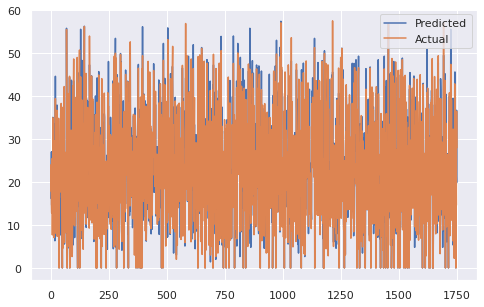

In [200]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_dt))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [201]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_dt
dt_df = test_df.loc[:,['Actual Count','Predicted Count']]
dt_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,16.186414
6914,24.083189,21.954498
233,15.033296,27.018512
982,12.845233,14.628739
5967,25.416530,26.925824


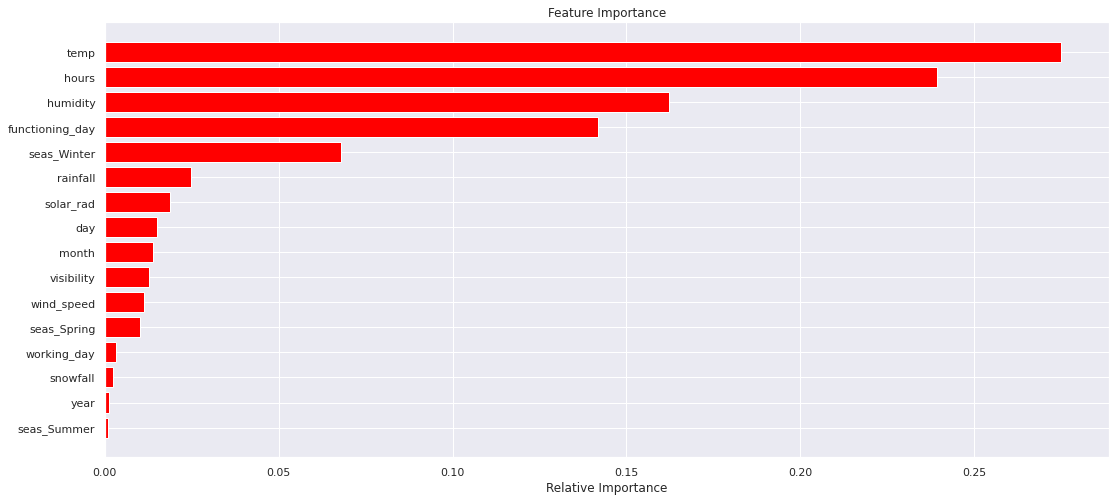

In [202]:
#Feature importance for Decision Tree.
features = X_train_df.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Observations:**

* After implementing the Random Forest algorithm, we obtain a R2 score of 89.64 %, which is considered appropriate. We will now attempt to maximize our R2 score by introducing more regression algorithms to our dataset.
* For a Random Forest model, the Temperature feature seems to be very significant following Hour and Isfunc_day.

#**Random Forest Regressor**

In [203]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Preparing the model
classifier = RandomForestRegressor(n_estimators=20, random_state=1) 


In [204]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [205]:
#Predicting values
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [206]:
#Calculating metrices
MSE_random=mean_squared_error(y_test, test_preds)
RMSE_random=np.sqrt(mean_squared_error(y_test, test_preds))
r2_score_train=r2_score(y_train, train_preds)*100
r2_randomforest=r2_score(y_test, test_preds)*100

print('Mean Squared Error:',MSE_random )
print('Root Mean Squared Error:',RMSE_random )
print('r2 score for train set is:', r2_score_train)
print('r2 score for test set is:', r2_randomforest )

Mean Squared Error: 14.85014966203571
Root Mean Squared Error: 3.8535891921734096
r2 score for train set is: 98.48060344696151
r2 score for test set is: 90.57051076824796


In [207]:
# Compare actual values with predicted values
test_df['Predicted count']=test_preds
test_df.head()

,Actual Count,Predicted count,Predicted Count
4059,17.888544,14.788584,16.186414
6914,24.083189,22.125640,21.954498
233,15.033296,17.041273,27.018512
982,12.845233,13.790636,14.628739
5967,25.416530,26.256214,26.925824


Text(0.5, 1.0, 'Comparision of actual and predicted values')

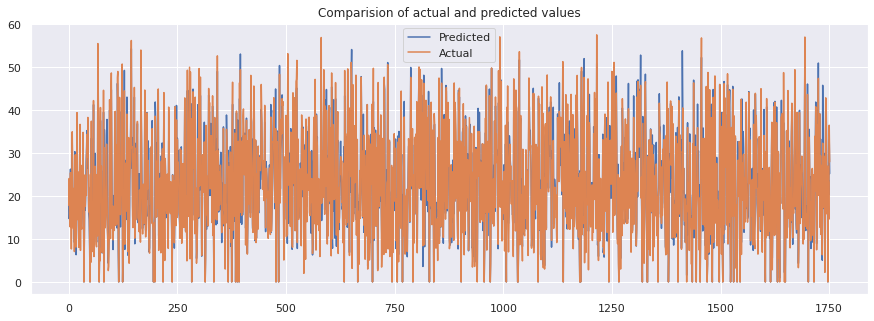

In [208]:
#Plotting actual and predicted value
plt.figure(figsize=(15,5))
plt.plot(test_preds)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [209]:
features = X_train_df.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

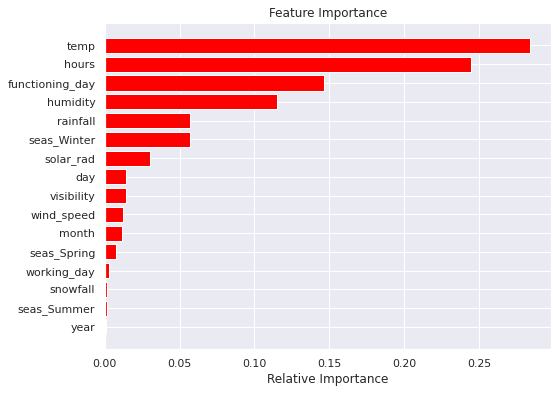

In [210]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#**Xgboost**

In [211]:
#Prepairing the model
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators=70, max_depth=10, eta=0.08,subsample=0.8, reg_lambda=1.2, random_state=0)

#fitting the model
xgb_reg.fit(X_train, y_train)

[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.08, max_depth=10, n_estimators=70, reg_lambda=1.2,
             subsample=0.8)

In [212]:
#Predicting train score
xgb_train_score= xgb_reg.score(X_train, y_train)*100

In [213]:
#Predicting the test data.
y_pred_xgb = xgb_reg.predict(X_test)

In [214]:
MSE_xgb  = mean_squared_error((y_test), (y_pred_xgb))
RMSE_xgb = np.sqrt(MSE_xgb)
r2_score_xgb = r2_score((y_test), (y_pred_xgb))*100

print("Mean Squared Error:" , MSE_xgb)
print("Root Mean Squared Error:" ,RMSE_xgb)
print('r2 score for train set is', xgb_train_score)
print("r2 score for test set is" ,r2_score_xgb)
print('Adjusted r2', (1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

Mean Squared Error: 13.380064565657932
Root Mean Squared Error: 3.6578770572092676
r2 score for train set is 99.08721841726398
r2 score for test set is 91.50397958179748
Adjusted r2 91.4256301139639


In [215]:
# Compare actual values with predicted values
test_df['Predicted count']=y_pred_xgb
test_df.head()

,Actual Count,Predicted count,Predicted Count
4059,17.888544,15.686398,16.186414
6914,24.083189,21.590357,21.954498
233,15.033296,15.867943,27.018512
982,12.845233,13.247058,14.628739
5967,25.416530,25.932594,26.925824


Text(0.5, 1.0, 'Comparision of actual and predicted values')

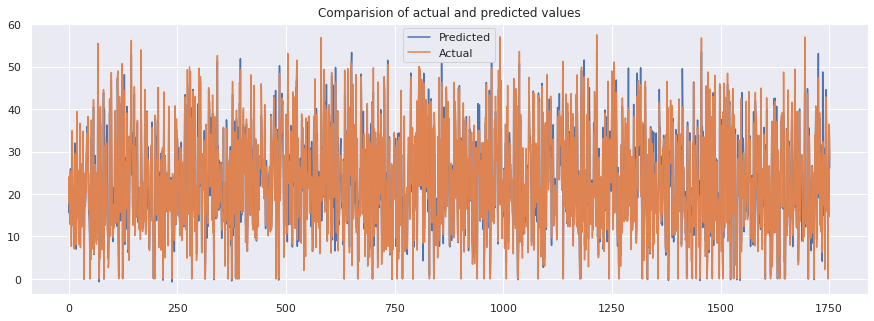

In [216]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_pred_xgb)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [217]:
# Plotting important features
importances = xgb_reg.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

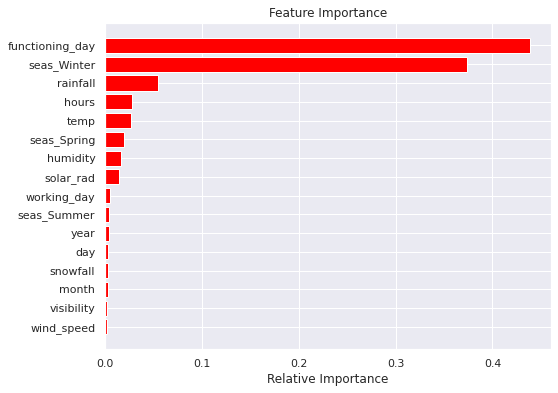

In [218]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Top most imporatant fatures are winter season followed by functioning day and hours.

# **Catboost**

In [219]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
#Implementing Cat Boosting.
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor(learning_rate= 0.5,verbose=500)
cat_reg.fit(X_train,y_train)
#check Score
cat_train_score = cat_reg.score(X_train,y_train)*100
cat_train_score

0:	learn: 8.4559024	total: 5.12ms	remaining: 5.12s
500:	learn: 1.3231278	total: 1.34s	remaining: 1.34s
999:	learn: 0.7224109	total: 2.9s	remaining: 0us


99.66184997508462

In [221]:
#Predicting the test data.
y_pred_cat = cat_reg.predict(X_test)

In [222]:
#Calculating MSE, RMSE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_cat))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_cat = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_cat)

print(f'\033[1mTrain R2_Score\033[0m: {cat_train_score}')

r2_cat = r2_score((y_test), (y_pred_cat))*100
print("\033[1mR2\033[0m :" ,r2_cat)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_cat)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 13.990469753837752
RMSE : 3.740383637254039
Train R2_Score: 99.66184997508462
R2 : 91.11638691236723
Adjusted R2 :  91.03446310291355


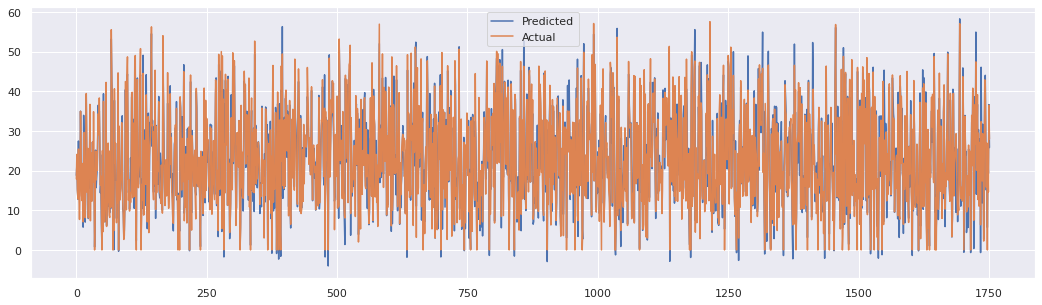

In [223]:
#Check performance of the model through plot.
plt.figure(figsize=(18,5))
plt.plot((y_pred_cat))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [224]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_cat
cat_df = test_df.loc[:,['Actual Count','Predicted Count']]
cat_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,18.799813
6914,24.083189,21.461755
233,15.033296,15.233412
982,12.845233,12.799065
5967,25.416530,27.443742


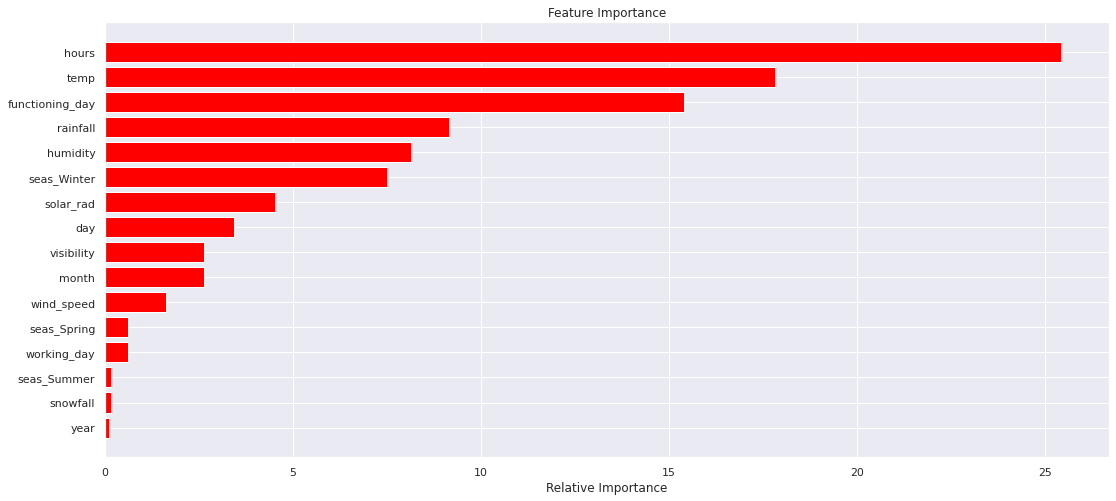

In [225]:
#Feature importance for Catboost
features = X_train_df.columns
importances = cat_reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the Cat Boosting algorithm, we obtain our model's highest R2 score of 91.29 %, which is considered best among all. 
* For a Cat Boosting model, the **Hour** feature seems to be very significant following Temperature and Isfunc_day.

## Comparing r2 scores of all models together
Comparing r2 scores of all models together so we can compare performence of each model.

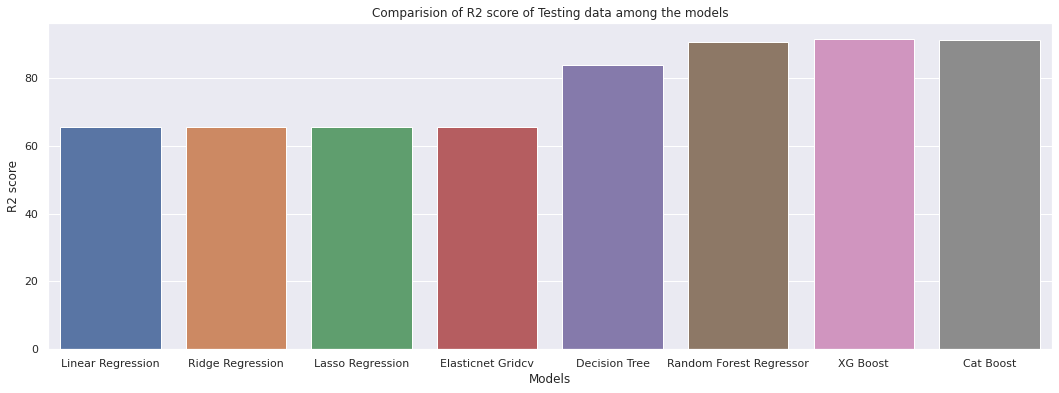

In [226]:
#Plotting the r2 score
models = ['Linear Regression','Ridge Regression','Lasso Regression','Elasticnet Gridcv','Decision Tree','Random Forest Regressor','XG Boost','Cat Boost']
r2_scores= [r2_linear, r2_ridge,r2_lasso, r2_elasticnet, r2_dt, r2_randomforest, r2_score_xgb, r2_cat ]
plt.figure(figsize=(18,6))

plt.ylabel("R2 score")
plt.xlabel("Models")
sns.barplot(x= models, y=r2_scores)
plt.title('Comparision of R2 score of Testing data among the models')
plt.show()

In [227]:
df_r2=pd.DataFrame(r2_scores, index=models, columns=['r2_score'])
df_r2

,r2_score
Linear Regression,65.604293
Ridge Regression,65.599463
Lasso Regression,65.573777
Elasticnet Gridcv,65.600583
Decision Tree,83.892071
Random Forest Regressor,90.570511
XG Boost,91.503980
Cat Boost,91.116387


***The XG Boost model, which predicted the data more accurately, came out on top, followed by Cat Boost and Random Forest for the hypertuned models.***

#Let us check R2 scores of our baseline models(without any tuning).

In [228]:
algos = [LinearRegression(),  Ridge(), Lasso(),
           ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), CatBoostRegressor() ]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Elastic Net', 'Decision Tree Regressor', 'Random Forest Regressor', 'XG Boost Regression', 'Cat Boost Regression']

rmse_list = []
R2 = []

In [229]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_final = r2_score((y_test), (y_pred))
    R2.append(r2_final)

[14:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.055691
0:	learn: 11.9353153	total: 3.06ms	remaining: 3.06s
1:	learn: 11.5030009	total: 6.08ms	remaining: 3.03s
2:	learn: 11.0696141	total: 9.49ms	remaining: 3.15s
3:	learn: 10.6862490	total: 12.7ms	remaining: 3.15s
4:	learn: 10.3039908	total: 15.8ms	remaining: 3.13s
5:	learn: 9.9641889	total: 18.6ms	remaining: 3.08s
6:	learn: 9.6437883	total: 21.3ms	remaining: 3.03s
7:	learn: 9.3450326	total: 24.4ms	remaining: 3.02s
8:	learn: 9.0437752	total: 27.5ms	remaining: 3.03s
9:	learn: 8.7667341	total: 30.2ms	remaining: 2.99s
10:	learn: 8.5081547	total: 33.2ms	remaining: 2.98s
11:	learn: 8.2689795	total: 36.1ms	remaining: 2.97s
12:	learn: 8.0600941	total: 41ms	remaining: 3.11s
13:	learn: 7.8602253	total: 44.5ms	remaining: 3.13s
14:	learn: 7.6775230	total: 48.6ms	remaining: 3.19s
15:	learn: 7.4926289	total: 51.5ms	remaining: 3.17s
16:	learn: 7.31349

In [230]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'R2_Score': R2})
print('\033[1m\033[4mThis dataframe shows baseline models evaluation scores\033[0m:','\n')
evaluation

This dataframe shows baseline models evaluation scores: 



,Model,RMSE,R2_Score
0,Linear Regression,7.359926,0.656043
1,Ridge Regression,7.360028,0.656033
2,Lasso Regression,7.926524,0.601046
3,Elastic Net,8.429005,0.548861
4,Decision Tree Regressor,5.161701,0.830822
5,Random Forest Regressor,3.836269,0.906551
6,XG Boost Regression,4.452914,0.874094
7,Cat Boost Regression,3.655620,0.915145


# **Conclusion**